# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [295]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [362]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [363]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [366]:
#data.describe()
#MEDV the  price is the  target. 

def print_desc_features():
    xlabels = {'RM':'no of rooms', 'LSTAT': '% working class', 'PTRATIO': 'pupil-teacher ratio'}
    print(xlabels)
print_desc_features()
data.describe()

#'lower class in neighbourhood', 'PTRATIO': 'pupil-teacher ratio'}


{'LSTAT': '% working class', 'RM': 'no of rooms', 'PTRATIO': 'pupil-teacher ratio'}


,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Peep a little into the data

In [367]:

data.head()



,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


{'LSTAT': 'lower class', 'RM': 'rooms', 'PTRATIO': 'pupil-teacher ratio'}


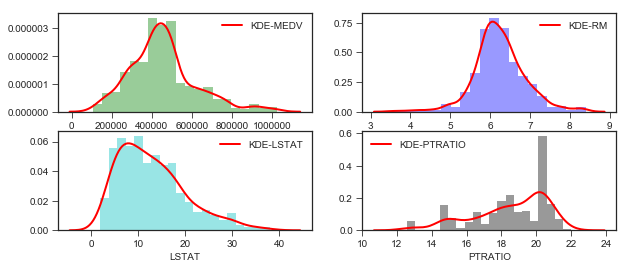

In [339]:
print_desc_features()
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(ncols=2,nrows=2,figsize=(10,4), sharey=False)
sns.distplot(prices, kde=True,bins=20,ax=ax0, color='g',kde_kws={"color": "r", "lw": 2, "label": "KDE-MEDV"})
sns.distplot(features.RM, kde=True,bins=20,ax=ax1,color='b', kde_kws={"color": "r", "lw": 2, "label": "KDE-RM"}
)
sns.distplot(features.LSTAT, kde=True,bins=20, ax=ax2, color='c', kde_kws={"color": "r", "lw": 2, "label": "KDE-LSTAT"}
)
sns.distplot(features.PTRATIO, kde=True,bins=20, ax=ax3,color='k', kde_kws={"color": "r", "lw": 2, "label": "KDE-PTRATIO"}
)





The above graphs  show the skewness/or not of the data. They all have a bell-shaped curve. PTRATIO has more of a bias. 

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

### Answer

In [301]:
#utility functions  for analysis purposes

def query_hack(feature,value):
    
    
    int_RM = (data[[feature]]).astype(int)
    RM_indices = np.where(int_RM==value)
    RM = data.RM.loc[RM_indices[0]]
    #print(RM_6)
    #print(data.loc[RM_6[0]])
    prices_for_value = data.MEDV.loc[RM_indices[0]]
    return  RM, prices_for_value


def get_unique_values(feature):
    return np.unique(data[[feature]])

#### Examples


* Lets see the distribution  of prices for all homes with RM = 6 and all homes with RM = 7.

The  below graph shows that the price buckets for RM=7 are relatively higher than the price buckets for RM=6
This makes sense. If we look at the feature independently of others, more the number of rooms, more the raw material and building costs, and hence more the  price. I am guessing the positive proportional  equation may not hold for houses with very large number of rooms (maybe lower demand), but given our dataset with a maximum of 8 rooms, there  is a directly proportional positive relationship between the RM and price. 

* Hence, RM-Increase => Price-Increase

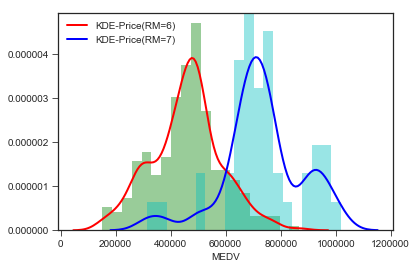

In [302]:

rm,prcs1 = query_hack("RM",6)
sns.distplot(prcs1, kde=True,bins=20,color='g', kde_kws={"color": "r", "lw": 2, "label": "KDE-Price(RM=6)"})

rm,prcs2 = query_hack("RM",7)

sns.distplot(prcs2, kde=True,bins=20,color='c', kde_kws={"color": "b", "lw": 2, "label": "KDE-Price(RM=7)"})


* Lets see the distribution of prices for all homes with LSTAT = 15 and all homes with LSTAT = 20.

The following price distribution graph shows that the price buckets for LSTAT=15 is higher than the price buckets for LSTAT=20; I would assume having a higher "lower class" percentage in the environment generally indicates a lower, more affordable price.By and large, more affluent families tend to have more expensive homes.

* Hence, LSTAT-decrease => Price-increase



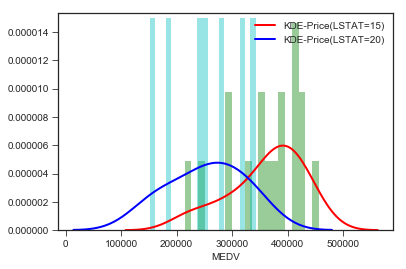

In [303]:

lstat,prcs = query_hack("LSTAT",15)
sns.distplot(prcs, kde=True,bins=20,color='g', kde_kws={"color": "r", "lw": 2, "label": "KDE-Price(LSTAT=15)"})

lstat,prcs = query_hack("LSTAT",20)

sns.distplot(prcs, kde=True,bins=20,color='c', kde_kws={"color": "b", "lw": 2, "label": "KDE-Price(LSTAT=20)"})


* Lets see the distribution of prices for all homes with PTRATIO = 12 and all homes with PTRATIO = 20.

The following graph shows the price buckets for PTRATIO=12 to be greater than the price buckets for PTRATIO=20.  I agree with this indication. Higher ratio of students per teacher is generally an indication of lack of resources at the school, its inability to hire more teachers required for the population. The education quality suffers. AHomeowners in such neighborhoods generally dont have the resources to afford expensive homes. The affluent home-owners prefer top-rated schools. 

* Hence, PTRATIO-decrease => Price-increase

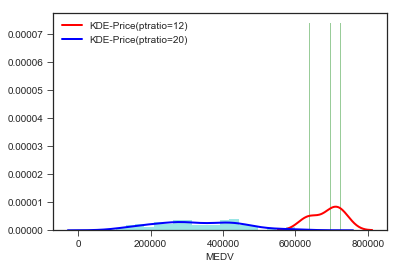

In [304]:


#print(get_unique_values("PTRATIO"))

lstat,prcs = query_hack("PTRATIO",12)
sns.distplot(prcs, kde=True,bins=20,color='g', kde_kws={"color": "r", "lw": 2, "label": "KDE-Price(ptratio=12)"})


lstat,prcs = query_hack("PTRATIO",20)

sns.distplot(prcs, kde=True,bins=20,color='c', kde_kws={"color": "b", "lw": 2, "label": "KDE-Price(ptratio=20)"})


#### Feature-Price Scatter Plots

The following scatter plots show us the general trends and they are in synch with the examples and the intuition above.


RM-increase => Price-increase
LSTAT-decrease => Price-increase
PTRATIO-decrease => Price-increase

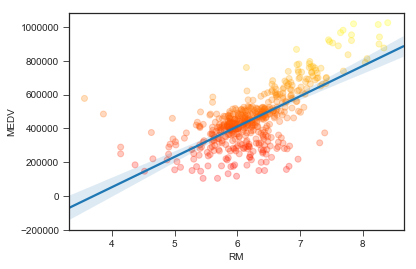

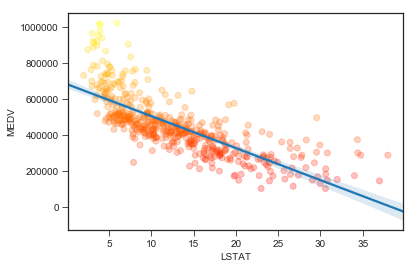

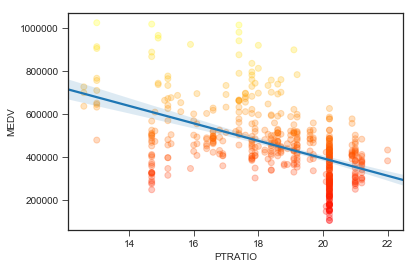

In [306]:

import matplotlib.pyplot as plt
import seaborn as sns

  
for i, name in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.scatter(features[name], prices, alpha=0.25, c=prices, cmap=plt.cm.autumn)
    plot = sns.regplot(data[name], prices, scatter=False)
    plt.show()
    


#### Feature Correlation (Pair-Plots)

The following pair plots show the correlation between the features -

More the rooms, the more  affluent the neighborhood, and lesser the number of students with a teacher.

* RM-increase => PTRATIO-decrease

More  the Lower Income  percent in a neighborhood, lesser the affordability and renumeration of education providers, and hence greater the PTRATIO

* LSTAT-increase => PTRATIO-increase

More the rooms, more the affluency, lesser the lower income percentage.

* RM-increase, LSTAT-decrease


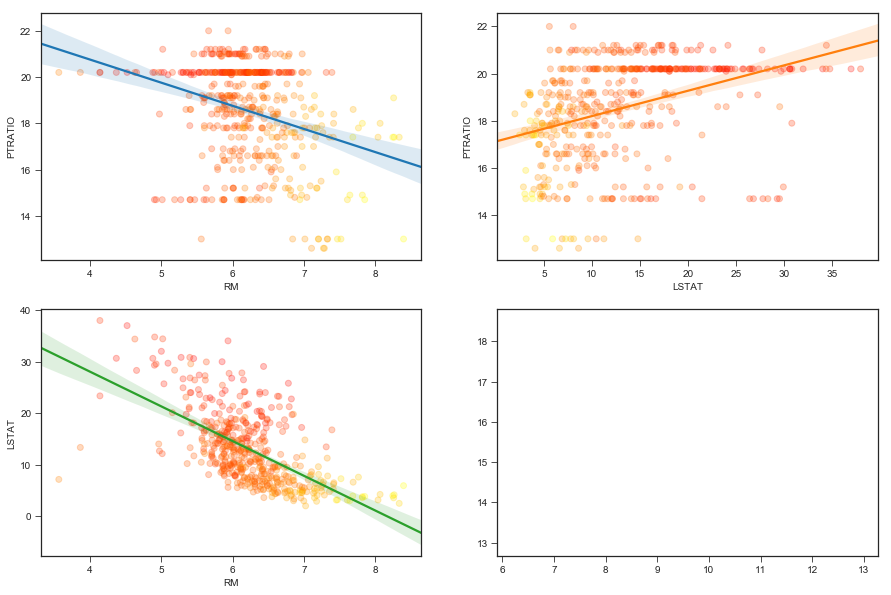

In [344]:

fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(ncols=2,nrows=2,figsize=(15,10), sharey=False)



ax0.scatter(data.RM, data.PTRATIO, alpha=0.25, c=prices, cmap=plt.cm.autumn)
sns.regplot(data.RM, data.PTRATIO, scatter=False, ax=ax0)


ax1.scatter(data.LSTAT, data.PTRATIO, alpha=0.25, c=prices, cmap=plt.cm.autumn)
sns.regplot(data.LSTAT, data.PTRATIO, scatter=False, ax=ax1)



ax2.scatter(data.RM, data.LSTAT, alpha=0.25, c=prices, cmap=plt.cm.autumn)
sns.regplot(data.RM, data.LSTAT, scatter=False, ax=ax2)
plt.show()

#### Correlation Heatmap

The following heat map quantifies the negative and positive correlation between features

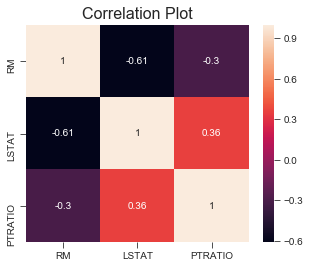

In [160]:

fig, ax = plt.subplots(figsize=(5,4))
plt.title("Correlation Plot",fontsize=16)
sns.heatmap(features.corr(), annot=True)

#### PCA  - Principal Component analysis


My primary intention to perform the PCA is to figure  which feature affects/correlates (positively/negatively) to the price the most. At the end of the  analysis, LSTAT seemed to drive the prices the most. It captures maximum variance in the data, amongst other features.

PCA is applied to data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.



  To perform PCA, we need to clean up the data -

* Scale the data
* Remove outliers

This would give us smoothend-normalized feature curves, that we could perform PCA upon.

#### 1. Scale the features
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.



C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


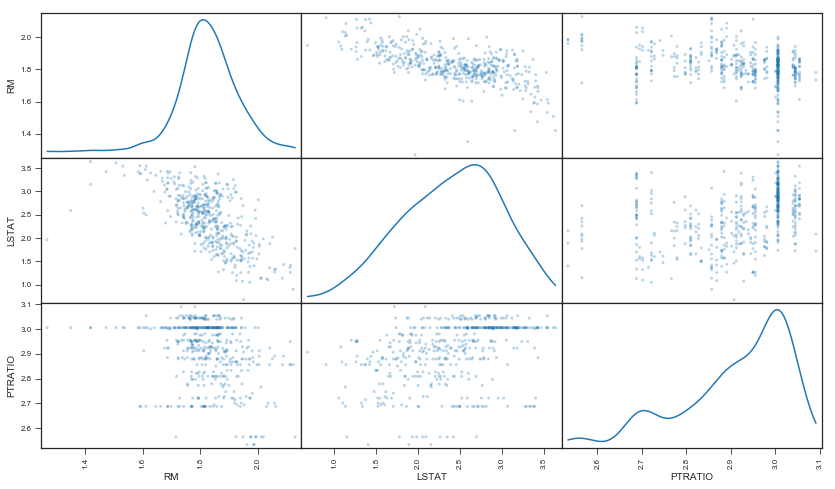

In [90]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(features)


# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### 2. Identify and remove outliers

Detecting outliers in the data is extremely important in PCA Analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.


In [91]:
# For each feature find the data points with extreme high or low values
outliers  = []
print(log_data.keys())
    
for feature in log_data.keys():
   
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    #print Q1
    #print Q3
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers.extend(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    
# OPTIONAL: Select the indices for data points you wish to remove
from collections import Counter
outliers_count = Counter(outliers)
multiple_outliers = list({indice for indice, count in outliers_count.items() if count > 1})
print ("Outliers for more than one feature: ", np.sort(multiple_outliers))

print ("Removing the following outliers from the dataset: {}".format(np.sort(list(set(outliers)))))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')
Data points considered outliers for the feature 'RM':


,RM,LSTAT,PTRATIO
97,2.088030,1.437463,2.890372
98,2.056685,1.272566,2.890372
144,1.589847,3.377246,2.687847
147,1.594527,3.385407,2.687847
197,2.060896,1.337629,2.687847
217,2.112151,1.420696,2.856470
218,2.084429,1.141033,2.856470
224,2.120703,0.904218,2.856470
225,2.109849,1.373716,2.856470
245,2.111304,1.264127,2.949688


Data points considered outliers for the feature 'LSTAT':


,RM,LSTAT,PTRATIO
40,1.949333,0.683097,2.906901


Data points considered outliers for the feature 'PTRATIO':


,RM,LSTAT,PTRATIO
190,1.986092,1.406097,2.533697
191,1.961080,2.152924,2.533697
192,1.984306,1.890095,2.533697
249,1.992385,2.052841,2.564949
250,1.923080,1.931521,2.564949
251,1.974498,2.260721,2.564949
252,2.017566,1.982380,2.564949
253,2.127994,1.776646,2.564949
254,1.991566,2.420368,2.564949
255,1.974914,2.091864,2.564949


Outliers for more than one feature:  [253]
Removing the following outliers from the dataset: [ 40  97  98 144 147 190 191 192 197 217 218 224 225 245 249 250 251 252
 253 254 255 256 257 258 270 353 354 355 356 357 367 369 371 389 395 397]


After scaling the data, and removing the outliers, we see that the feature-curves are more bell-shaped and lesser skewed than they were before  the preprocessing

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


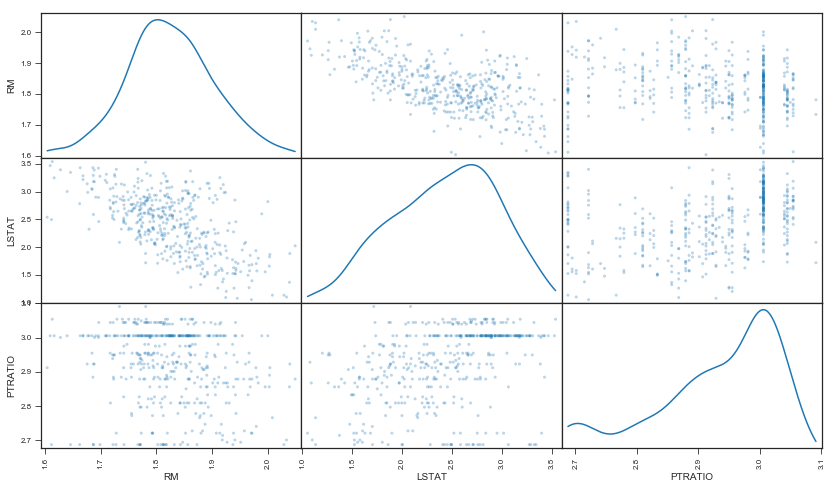

In [93]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


#### PCA Implementation

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

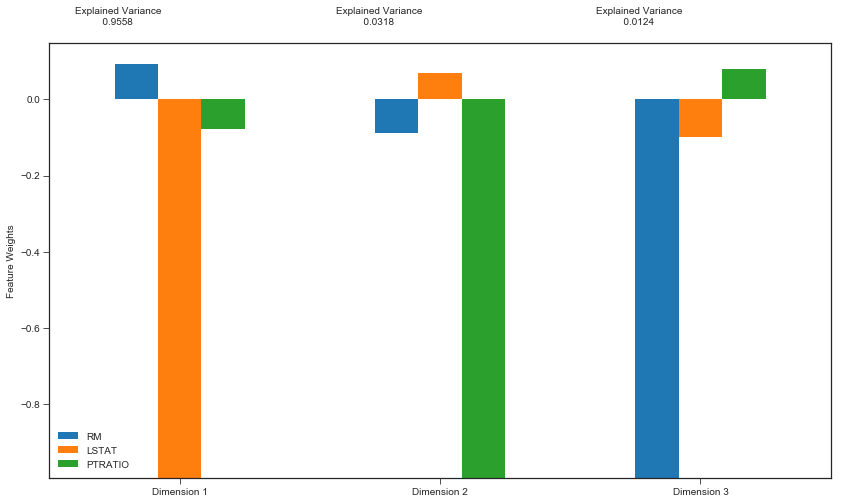

In [97]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
import visuals_cs as vs_cs
from imp  import reload
visuals_cs = reload(visuals_cs)
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
# Generate PCA results plot
pca_results = vs_cs.pca_results(good_data, pca)


The first  principal component explains 95.58 % of the variance in the data.

The LSTAT is negatively correlated to the Price, in the first  component. It is also the highest correlated to  the price, given its variance coverage.



In [182]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)


# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

#print good_data.shape
#print reduced_data.shape

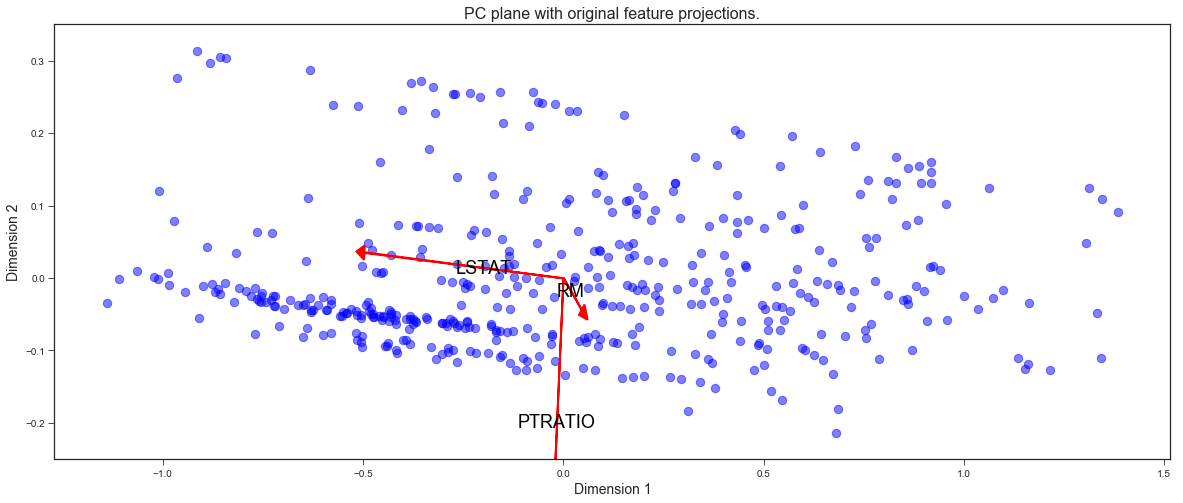

In [192]:
vs_cs = reload(vs_cs)
vs_cs.biplot(good_data, reduced_data, pca)


The above graph shows that LSTAT is strongly correlated with Dimention 1 (First Principal component) and that is indicated by the PCA bar map above. It also models the maximum variance (given  the First Principal Component has a variance of ~ 95%)



----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [21]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
      

    #mse = mean_squared_error(y_true, y_predict)
    r2 = r2_score(y_true,y_predict)
    
    # Return the score
    #return r2,mse
    return r2

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [22]:
# Calculate the performance of this model

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

Yes, the model has captured the variation of the target variable successfully. The truth  and the predict values though not the same, are very close numerically. 7 is not  7.8, but they are close. The R2 score doesn't look for equality but for proximity between  the truth and the predict values. The very high R2 score - 0.923 (close to 1) indicates that the dependent  variable can be predicted from the independent variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [23]:
#shuffle_sets = ShuffleSplit(prices.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

def shuffle_split_data(X, y,test_percent,random_state):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    print("Total: "+str(y.shape[0]))
    X = X.values
    y=y.values
    rs = ShuffleSplit(X.shape[0], n_iter=3, test_size=test_percent,random_state=random_state)
    for train_index, test_index in rs:
   
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# TODO: Import 'train_test_split'

# TODO: Shuffle and split the data into training and testing subsets
#X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = sklearn.model_selection.StratifiedShuffleSplit(n_splits=10, test_size=’default’, train_size=None, random_state=None)
X_train, y_train, X_test, y_test = shuffle_split_data(features, prices, 0.2,0)
print("X_train : "+str(len(X_train)))
print("y_train : "+str(len(y_train)))

print("X_test : "+str(len(X_test)))

print("y_test : "+str(len(y_test)))

# Success
print("success")

Total: 489
X_train : 391
y_train : 391
X_test : 98
y_test : 98
success


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

The primary cause of poor performance in machine learning is either overfitting or underfitting the data.

Overfitting occurs when the model fits the data too well. It occurs as a result of an excessively compliated model that  cannot generalize its prediction to a larger population. This is a case of high variance and low bias.

Underfitting occurs when the model cannot capture the underlying trend/relationships of the data. Underfitting is often a result of an excessively simple model. It occurs if the model shows low variance but high bias.  

Dividing the dataset into train and test helps check the model for overfitting or underfitting and hence allows for its tuning. It also validates the accuracy of the model.

Lets say we split the data into 80:20 (train:test) ratio, train on the training set, and test on the testing set.

* If the test cost/error is much higher than  train cost/error, then it implies the model overfits.
* If the model has high cost/error in both the train and test datasets, it indicates the model is underfitting both sets and has high Bias.

Split sizes can have the following repercussions.

* If the training data is less, the parameter estimates may have greater variance.
* With less testing data, the performance statistic will have greater variance.

We must split, such that neither of the above variances are high. The  split should also facilitate an optimal variance-bias tradeoff.






----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

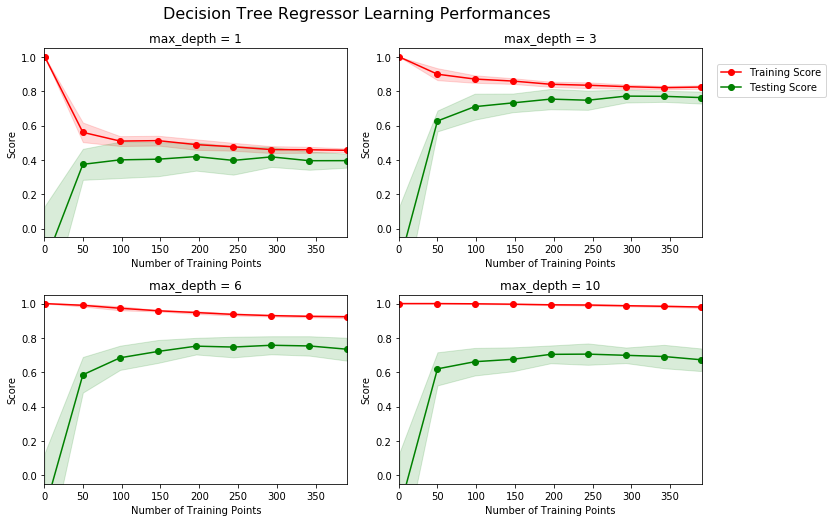

In [24]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

I choose the graph with max-depth = 3.

As more training points are  added, the score of the training curve decreases before plateauing at approx 0.8. Adding more training points increases the test score with a sharp positive slope in the initial testing points before plateauing at a value approx 0.8.

The two curves seem to be converging at approximately 300 points, before the test-curve develops a slight negative slope and hence diverges from the train curve. 

The excess training points over 300, seem to be redundant, adding no value. This is as a result of the convergence. I would assume 300 training points would be ideal.

Other converging graphs with higher/lower max-depths  show lower accuracy.

The graph with max-depth = 10 with a high consistent training score  seems overfitted.

The lesser number of features (3) causes an intrinsic bias in the model, the complexity of data maynot be captured with just three features. We can see the bias in the negative  slope of train score in almost  all the graphs.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

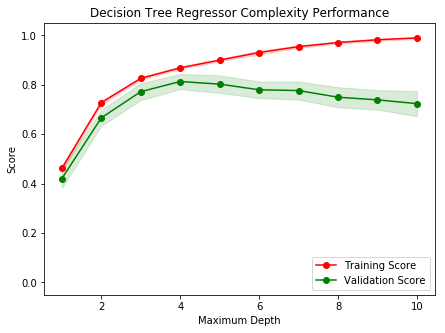

In [25]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

In graph with max-depth=1, the negative slope of the  training curve  and its low score of 0.5 shows that  it is not complicated enough to capture the underlying trend of the data. This shows high bias. 

In graph with max-depth=10, the model  shows an almost perfect fit to the training data, but a wide margin of error in the testing score at approx 0.65. It is unable to generalize the fit to  the test data. This indicates high variance, and overfitting.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

The model with max-depth=3 finds a balance between the score, complexity, and performance. It shows optimal bias-variance tradeoff amongst others.

It has a high validation score compared to some of the others. It shows robustness as the train/tests scores are very close.  The ones with higher depths do not seem to be increasing the score and show higher differences between the test-train scores. Having max-depth=3 is also more computationally efficient than the  ones with higher depths. 


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

Often  while validating we find we need to tune our  hyperparameters. The optimal set of hyperparameters are obtained by running the model with their various permutations and combinations. 

For instance, if learning-rate is  a hyperparameter, a high learning-rate may cause overfitting as model may learn too quickly but overshoots the optimal score. A low learning rate may cause underfitting. Multiple trials are required with varying learning-rates to figure  the best. This is tedious manually.

The grid search does  this for us.

The grid search technique takes in a range of various hyperparameters  and executes a given estimator with all possible combinations of given parameters within their ranges. Its a grid-like tuning, and hence  the name. The scoring function is then  used  to find the optimal combination of the parameters  for  the given  model.


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

Cross-Validation in general helps treat overfitting/underfitting by allowing for tuning ofhyperparameters during the validation phase and preserving the integrity of test data as the unseen data. It also gives us a more realistic validation score based on the calculation of an average of the scores over various splits, thus normalizing the prediction score.

The k in k-fold cross validation stands for the number of splits. The data is split  into k sets  each having a dfferent test set.

 The model is validated against each set and the average of all validation scores is used to rate the model.
 
This technique is useful when we use it in combination with grid search since we can run each permutation of grid search with a different partition from the data, K.
The k results from the folds can then be averaged to produce a single estimation.
If we do grid search on an erroraneous/broken dataset, the different permutations of our algorithim will return highly varying results compared to the average estimation.
Another great benefit of using k-fold with GridSearch to provide the best possible learning results and validation with a possibly limited data set.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [355]:
all_scores = []

from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 42 * 7)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
   
    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    #print(grid.grid_scores_)
    global all_scores    # Needed to modify global copy of globvar
    all_scores = [x[1] for x in grid.grid_scores_]
    
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [356]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model


[0.4202327080033327, 0.6660445813633967, 0.7721331700321377, 0.8117771743564568, 0.8007635553851828, 0.7867064344771734, 0.7671742428571194, 0.7507541675852688, 0.7437997926272814, 0.7269350315760773]


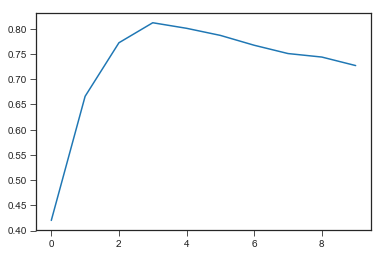

In [357]:
plt.plot(all_scores)
print(all_scores)


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **
Optimal Max-Depth=4; Very close to my answer in Question-5/6 where I chose model with max-depth=3. The score for max-depth=4 is 0.80 (see plot above) which is very close to the one with max-depth=3


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [273]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
   

Predicted selling price for Client 1's home: $403,009.09
Predicted selling price for Client 2's home: $235,900.00
Predicted selling price for Client 3's home: $942,327.27


Heatmap of the client data shows the positive and negative correlations.

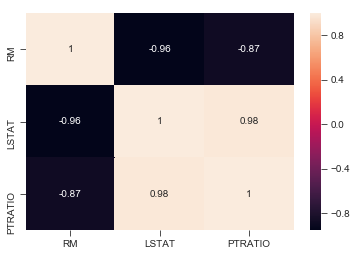

In [274]:
 

client_df = pd.DataFrame(np.array(client_data).reshape(3,3), columns=['RM','LSTAT','PTRATIO'])
corr = client_df.corr()
sns.heatmap(corr,annot=True,xticklabels=['RM','LSTAT','PTRATIO'], yticklabels =['RM','LSTAT','PTRATIO'])


For the client data, we see very high correlations in the  above heat-map.

RM-LSTAT, RM-PTRATIO have a strong negative correlation.
LSTAT-PTRATIO have a strong positive correlation.


The following scatterplots show the client data and its predicted prices overlayed on the original  data. They seem to be in synch.

* More rooms, more  price.

* More LSTAT, less price.

* More PTRATIO, less price.

r


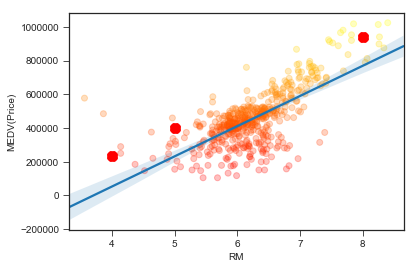

b


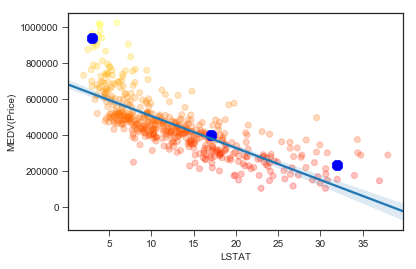

g


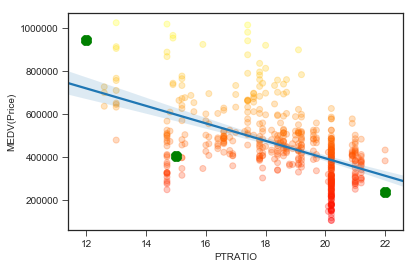

In [278]:

colors = ['r','b','g']
preds = reg.predict(client_data)
for i, feature in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    print(colors[i])
    plt.scatter(features[feature], prices, alpha=0.25, c=prices, cmap=plt.cm.autumn)
    plt.scatter(client_df[feature], preds, marker='X', linewidths=5,color=colors[i])
    sns.regplot(features[feature], prices, scatter=False)
    plt.xlabel(feature)
    plt.ylabel('MEDV(Price)')
    plt.show()


Lets take a look at the predictions from the Nearest Neighbor methods for the  new client-data. The following finds an average of prices of homes closest  in feature-values to the new  client homes.

"The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these.  The distance measured is the standard Euclidean distance."

In [334]:
from sklearn.neighbors import NearestNeighbors
n_neighbors=5


def find_NN_indices(client_home):
        # x is your vector and X is the data set.
        nn_clr = NearestNeighbors( n_neighbors )
        nn_clr.fit(features)
        dist, indices = nn_clr.kneighbors(client_home )
        return indices

def NN_price(client_home):
    indices = find_NN_indices(client_home)
    NN_prices =prices.values[indices]
    NN_avg = np.mean(NN_prices)
    return NN_avg

print("NearestNeighbor predictions")

index = 0  
for home in client_data:
    home=[home]
    #print(type(home))
    #print(type([i]))
    nn_avg_price=NN_price(home)
    index+=1
    print ("The Average prices of {} nearest neighbors  of client-data {} is: ${:,.2f}".format(n_neighbors,index, nn_avg_price))

NearestNeighbor predictions
The Average prices of 5 nearest neighbors  of client-data 1 is: $315,840.00
The Average prices of 5 nearest neighbors  of client-data 2 is: $280,980.00
The Average prices of 5 nearest neighbors  of client-data 3 is: $808,920.00


The predictions by the DecisionTreeRegressor of the client data (as performed earlier):
    
* Predicted selling price for Client 1's home: $403,009.09

* Predicted selling price for Client 2's home: $235,900.00

* Predicted selling price for Client 3's home: $942,327.27

Going by the above, we see that the neighborhood values are close to the predicted values.

Revisiting stats for data -

In [280]:
# Show descriptive statistics for each feature\n",
print("Statistics for the features and the prices")
print ('Features:')
print (features.describe())
print ('Price:')
print (prices.describe())

Statistics for the features and the prices
Features:
               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000
Price:
count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64


If we look at data and statistics above.

Client 1 : We find that client 1 is close to the mean and median values for each feature, and so is its predicted price of $403,009.09. The price seems reasonable. This is neither  an affluent communicty, nor a high-working-class community. It falls in the middle.

Client 2: The  LSTAT is much bigger than the mean LSTAT. In PCA, we found that LSTAT drives prices the maximum. The PTRATIO is also higher than its mean. Higher LSTAT and PTRATIO are pushing down the price of the house. This is a house of a similar size as client 1's, but is in a neighborhood with a bigger working-class and more financially constrained school district. The price makes reasonable sense.

Client 3: This is a much larger house and going by its deviations from mean and feature characteristics, this seems like an affluent neighborhood. The PTRATIO however is higher than its mean.  This falls in line with the PCA analysis that states that LSTAT superseeds in its price-push, compared to the other features. The very low LSTAT primarily and the very high RM pushes the price up. The price makes reasonable sense.






**Answer**

The correlation heatmap, the scatter plots, the nearest neighbor analysis and the above statistical analysis show that  the predictions  are reasonably accurate (definitely meeting the 80% score of the model prediction)

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [358]:
#pred_prices, best_depth = iterGridSearch(features, prices,  client_data)
vs.PredictTrials(features, prices, fit_model, client_data)
#print(best_depth)

Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $103,732.22


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

The data collected in 1978 may not be relevant now numerically. But the relationships between the provided features are reasonably relevent today. 

They could change  in future, for instance, if education goes online (like Udacity),  PTRATIO wouldn't matter. If more and more younger population decide to buy starter homes with lesser number of rooms due to increasing rents, the demand for working-class homes could go up and LSTAT may not matter all that much. 

No, the provided number of features are too few , though salient, to create a model for the real world. The  goal should be to  secure  an  accuracy % closer to 100. However, this  could be used to get a preliminary sense of price trends.

A few other deciding features could be -  proximity to work, proximity to parks/schools, whether it  is a starter home/townhome/single-family, whether it has a yard etc, square footage, stainless steel appliances, upgrades etc.

The ranges obtained by trying out a few permutations and combinations of the three features, suggest that the model can make reasonably consistent predictions within a probably acceptable range.  The above  range $103,732.22 is approximately one standard deviation from mean. This is reasonable.

Would data collected in an urban city like Boston be applicable in a rural city?

No. The cost of living, nature of demography, people's  choices  etc may vary.

Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

There may be some cases. However, cost of living, rental highs, smaller families etc could push people into high LR neighborhoods andd the primary factor could boil down to affordability. The neighborhood may not matter all that  much.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.